<p><a href="https://colab.research.google.com/github/gdsaxton/GDAN5400/blob/main/Coding%20Assignment%203/GDAN%205400%20-%20Coding%20Assignment%203%20-%20Solutions.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" /></a></p>

# Coding Assignment #3

In this third assignment, you will continue working with the **roof insurance claim dataset** from Coding Assignments #1 and #2. This assignment will focus on **data visualization** and **univariate statistics** using PANDAS and Seaborn.

In this assignment, you will:
1. Generate and interpret summary statistics for key variables.
2. Create and customize various plots, including histograms, bar charts, and count plots.
3. Use boxplots to analyze distributions and identify potential outliers.
4. Generate and interpret a pie chart for categorical data.
6. Perform aggregation and grouping operations to visually summarize patterns in the dataset.

These exercises will help strengthen your ability to explore, visualize, and analyze real-world accounting datasets.

## CASE INTRODUCTION

Casey Lee, an insurance claims processor was reviewing claims received from a recent storm before finalizing authorization for roof replacements. She pulled up and reread the U.S. National Weather Service Announcement:

&nbsp;&nbsp; TORNADO WARNING  
&nbsp;&nbsp; NATIONAL WEATHER SERVICE CHICAGO/ROMEOVILLE   
&nbsp;&nbsp;1215 AM CDT THU SEP 12 20XX  

&nbsp;&nbsp;THE NATIONAL WEATHER SERVICE IN CHICAGO HAS ISSUED A   
&nbsp;&nbsp;*TORNADO WARNING FOR...    
&nbsp;&nbsp;CENTRAL DEKALB COUNTY IN NORTH CENTRAL ILLINOIS...    
&nbsp;&nbsp;UNTIL 530 PM CDT.  

&nbsp;&nbsp;*AT 1218 AM CDT, A SEVERE THUNDERSTORM CAPABLE OF PRODUCING A  
&nbsp;&nbsp;TORNADO WAS LOCATED NEAR SYCAMORE,  
&nbsp;&nbsp;OR NEAR SHABBONA, MOVING SOUTHWEST AT 2 MPH.  
&nbsp;&nbsp;&nbsp;&nbsp;  HAZARD...TORNADO AND QUARTER-SIZED HAIL.  
&nbsp;&nbsp;&nbsp;&nbsp;  SOURCE...RADAR INDICATED ROTATION.  
&nbsp;&nbsp;&nbsp;&nbsp; IMPACT...FLYING DEBRIS WILL BE DANGEROUS TO THOSE CAUGHT WITHOUT SHELTER.   
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;MOBILE HOMES WILL BE DAMAGED OR DESTROYED.  
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   DAMAGE TO ROOFS, WINDOWS, AND VEHICLES WILL OCCUR. TREE DAMAGE IS LIKELY.  

&nbsp;&nbsp;*THIS DANGEROUS STORM WILL BE NEAR...  
&nbsp;&nbsp;SYCAMORE AROUND 1240 AM CDT.   
&nbsp;&nbsp;DEKALB AROUND 600 AM CDT.  
&nbsp;&nbsp;COURTLAND AROUND 1140 AM.     

&nbsp;&nbsp;PRECAUTIONARY/PREPAREDNESS ACTIONS...   

&nbsp;&nbsp;TAKE COVER NOW! MOVE TO A BASEMENT OR AN INTERIOR ROOM  
&nbsp;&nbsp;ON THE LOWEST FLOOR OF A STURDY BUILDING.  
&nbsp;&nbsp;AVOID WINDOWS. IF YOU ARE OUTDOORS, IN A MOBILE HOME, OR IN A VEHICLE,   
&nbsp;&nbsp;MOVE TO THE CLOSEST SUBSTANTIAL SHELTER AND PROTECT YOURSELF FROM FLYING DEBRIS.    

Indeed, it appeared to be a bad storm, which could substantiate the large number of claims that she received for new roofs from hail and wind damage. Yet, she felt that something could be off.

While Casey could not process the data from multiple companies, she knew that the National Insurance Crime Bureau might be able to help by aggregating data from multiple insurance companies across the area hit by the storm and evaluating the data to look for anomalies. Casey's request landed on your desk. As a new fraud specialist, you have been hired to investigate claims following storm damage to hopefully reduce the payouts made to false claimants. You also knew you had to act fast. You began by pulling the claims data for roofs. You also received a database that showed the actual path of this storm. Your task is to sort through the claims to see if there were any unusual claim patterns from this recent weather event.

---
Case introduction and dataset comes from: Cheng, C., & Lee, C.-C. (2023). A Case Study Using Data Analytics to Detect Hail Damage Insurance Claim Fraud. *Journal of Forensic Accounting Research, 8,* 287–306.

# Load and Prepare the Dataset
We will first get set up to run the assignment, using code from Coding Assignments #1 and #2

In [74]:
import pandas as pd

#http://pandas.pydata.org/pandas-docs/stable/options.html
pd.set_option('display.max_columns', None)  #Set PANDAS to show all columns in DataFrame
pd.set_option('max_colwidth', 500)

### Load the Dataset and show first two rows:
  - Load the roof insurance claim dataset (provided in `.xlsx` format) into a Pandas DataFrame named `df`
  - Show the first two rows
  - *Note*: We will read in a version of the dataset where we have applied the data cleaning steps from coding assignments 1 and 2.

In [75]:
import requests

# NOTE: replace `https://github.com/` with `https://raw.githubusercontent.com`
# https://github.com/gdsaxton/GDAN5400/blob/main/Coding%20Assignment%201/final_insurance_fraud.xlsx
url = 'https://raw.githubusercontent.com/gdsaxton/GDAN5400/main/Coding%20Assignment%203/final_insurance_fraud.xlsx'

# Download the file
response = requests.get(url)
with open('final_insurance_fraud.xlsx', 'wb') as f:
    f.write(response.content)

# Load the Excel file
df = pd.read_excel('final_insurance_fraud.xlsx', engine='openpyxl')

print('# of rows:', len(df), '\n')

df[:2]

# of rows: 421 



,Policy Number,Claim number,Surname,Forenames,Occupation,House/Apartment Number,Street Address,Latitude,Longitude,Zip Code,City,County,Telephon number,Loss or damage details,Date of loss,time of loss,Date&Time,Claim Date,How did the loss or damage happen?,Type of roof,Age of roof,Estimated cost to repair,Estimated cost to replace,Adjuster,Roofing Company,Home Square Feet,Stories,Storm Name,Wind Speed,Rainfall,Hail Diameter
0,3989062048,6957097359,Bryant,Penelope,Civil Engineer,777,Maplewood Dr,41.997723,-88.68515,60178,Sycamore,DeKalb,7792373532,Hail Damage to roof,2019-09-12,1900-01-01 00:45:00,9/12/19 00:45,2019-09-24,Hail Damage,Asphalt/Shingle,11,6791,0,Dudley,GAF Certified Contractors,3562,2,Andy,50,1.75,1.3
1,3681223321,1484217434,Delacruz,Meghan,Civil Engineer,868,Maplewood Dr,41.997723,-88.68515,60178,Sycamore,DeKalb,7791902376,Hail Damage to roof,2019-09-12,1900-01-03 00:45:00,9/12/19 00:45,2019-09-18,Hail Damage,Asphalt/Shingle,9,5152,0,Dudley,GC Gamez Construction,775,3,Andy,61,1.03,1.4


# **Instructions: Steps to Complete**

### Task 1:  Import Necessary Libraries
- Import **Matplotlib** and **Seaborn** for visualization.

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

### Task 2:  Calculate the Mean and Median Repair Cost
- Compute and print the **mean** and **median** of `Estimated cost to repair`.

In [77]:
mean_repair = df['Estimated cost to repair'].mean()
median_repair = df['Estimated cost to repair'].median()

print(f"Mean Repair Cost: ${mean_repair:,.2f}")
print(f"Median Repair Cost: ${median_repair:,.2f}")

Mean Repair Cost: $4,932.09
Median Repair Cost: $5,132.00


### Task 3:  Find the Maximum and Minimum Wind Speeds
- Identify the **highest** and **lowest** wind speeds recorded in the dataset.

In [78]:
max_wind = df['Wind Speed'].max()
min_wind = df['Wind Speed'].min()

print(f"Maximum Wind Speed: {max_wind} mph")
print(f"Minimum Wind Speed: {min_wind} mph")

Maximum Wind Speed: 65 mph
Minimum Wind Speed: 5 mph


### Task 4:  Calculate the Standard Deviation of Rainfall
- Compute the standard deviation of the `Rainfall` column.

In [79]:
rainfall_std = df['Rainfall'].std()
print(f"Standard Deviation of Rainfall: {rainfall_std:.2f} inches")

Standard Deviation of Rainfall: 0.65 inches


### Task 5: Create a Histogram of Estimated Repair Costs
- Plot a histogram to visualize the distribution of `Estimated cost to repair`.

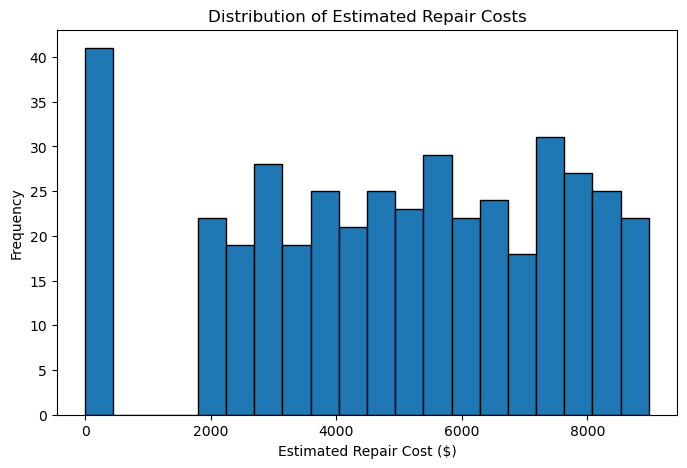

In [80]:
plt.figure(figsize=(8,5))
plt.hist(df['Estimated cost to repair'], bins=20, edgecolor='black')
plt.xlabel("Estimated Repair Cost ($)")
plt.ylabel("Frequency")
plt.title("Distribution of Estimated Repair Costs")
plt.show()

<br>If we want to drop all the zeros, which will be replaced rather than repaired.

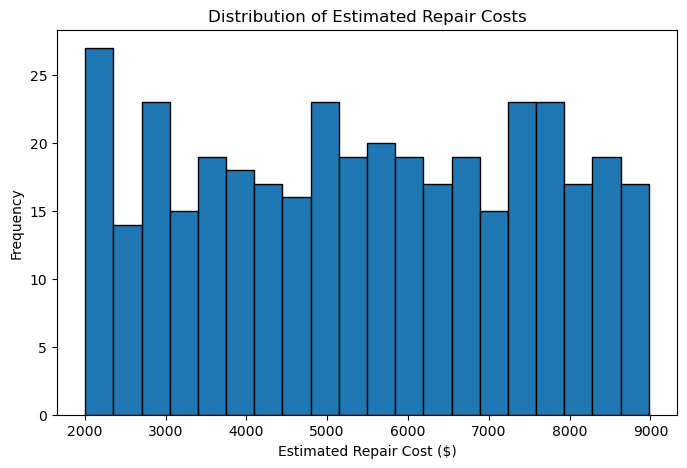

In [86]:
plt.figure(figsize=(8,5))
plt.hist(df[df['Estimated cost to repair'] > 0]['Estimated cost to repair'], bins=20, edgecolor='black')
plt.xlabel("Estimated Repair Cost ($)")
plt.ylabel("Frequency")
plt.title("Distribution of Estimated Repair Costs")
plt.show()

### Task 6: Create a Boxplot for Wind Speed
- Use a boxplot to check for outliers in `Wind Speed`.

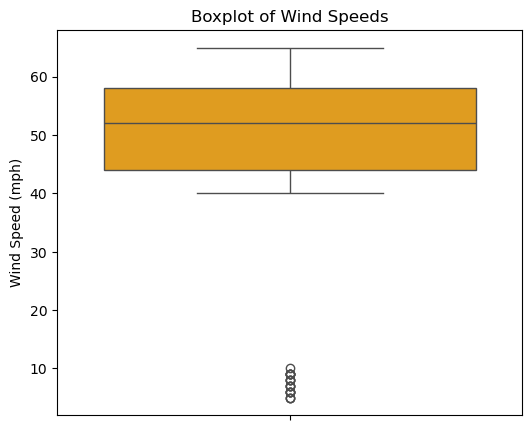

In [89]:
plt.figure(figsize=(6,5))
sns.boxplot(y=df['Wind Speed'], color='orange')
plt.ylabel("Wind Speed (mph)")
plt.title("Boxplot of Wind Speeds")
plt.show()

In [90]:
df[['Wind Speed']].describe().T

,count,mean,std,min,25%,50%,75%,max
Wind Speed,421.0,49.760095,12.64297,5.0,44.0,52.0,58.0,65.0


## Understanding the Boxplot for 'Rainfall'

A **boxplot** (or **box-and-whisker plot**) is a statistical visualization that summarizes the distribution of a dataset. When applied to **rainfall data**, it helps us understand the spread, central tendency, and presence of outliers.

### **Key Components of a Rainfall Boxplot**
1. **Median (Q2 - 50th percentile)**  
   - The horizontal line inside the box represents the **median rainfall** (middle value of the dataset).

2. **Interquartile Range (IQR - Q1 to Q3)**  
   - The **box** extends from the **first quartile (Q1 - 25th percentile)** to the **third quartile (Q3 - 75th percentile)**.
   - This range contains the **middle 50%** of the rainfall data.

3. **Whiskers (Minimum and Maximum, within 1.5 * IQR)**  
   - The **whiskers** extend from the box to the lowest and highest values within **1.5 times the IQR**.
   - These represent the **typical range** of rainfall measurements.

4. **Outliers**  
   - Any rainfall values **beyond 1.5 * IQR** are shown as **individual points**.
   - These represent **extreme rainfall events**, such as heavy storms or droughts.

### **What the Boxplot Reveals About Rainfall**
- A **wide box** indicates high variability in rainfall.
- A **narrow box** suggests consistent rainfall levels.
- A **long upper whisker** may indicate occasional heavy rain events.
- **Outliers** signal extreme weather conditions or unusual rainfall patterns.

This visualization is particularly useful for analyzing seasonal changes in rainfall and identifying trends over time.


### Task 7: Create a Bar Chart for Adjusters
- Plot a bar chart showing the number of claims per adjuster.

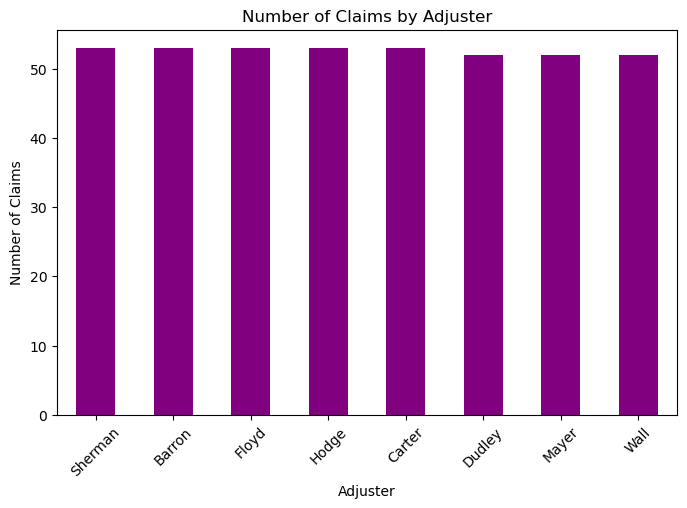

In [91]:
plt.figure(figsize=(8,5))
df['Adjuster'].value_counts().plot(kind='bar', color='purple')
plt.xlabel("Adjuster")
plt.ylabel("Number of Claims")
plt.title("Number of Claims by Adjuster")
plt.xticks(rotation=45)
plt.show()

### Task 8: Create a Count Plot of Adjusters
- Use a `countplot` to show the number of claims handled by each adjuster.

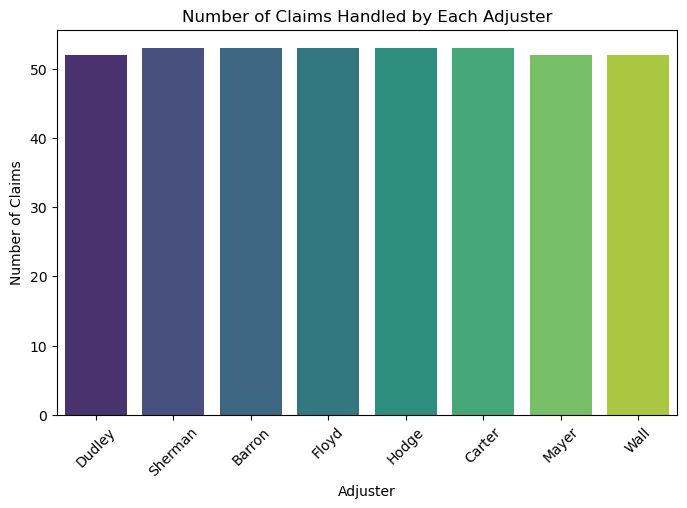

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x=df['Adjuster'], hue=df['Adjuster'], palette='viridis')
plt.xlabel("Adjuster")
plt.ylabel("Number of Claims")
plt.title("Number of Claims Handled by Each Adjuster")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability if needed
plt.show()


To order the values in your `sns.countplot()`, you should use the `order` parameter with `value_counts().index`. Here’s the code:

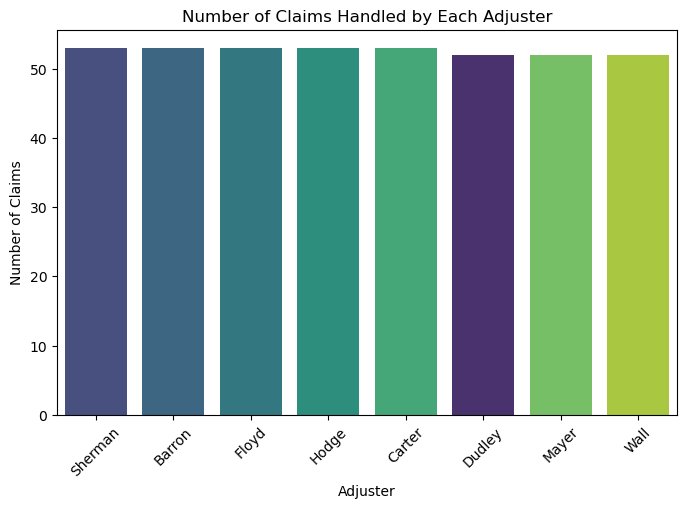

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x=df['Adjuster'], hue=df['Adjuster'], order=df['Adjuster'].value_counts().index, palette='viridis')
plt.xlabel("Adjuster")
plt.ylabel("Number of Claims")
plt.title("Number of Claims Handled by Each Adjuster")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability if needed
plt.legend([],[], frameon=False)  # Remove redundant legend
plt.show()

### Explanation of Changes:
1. **`order=df['Adjuster'].value_counts().index`**: Orders the bars by the most frequent adjusters.


<br>If you'd like a horizontal bar chart, change the `x=` argument to `y=`: 

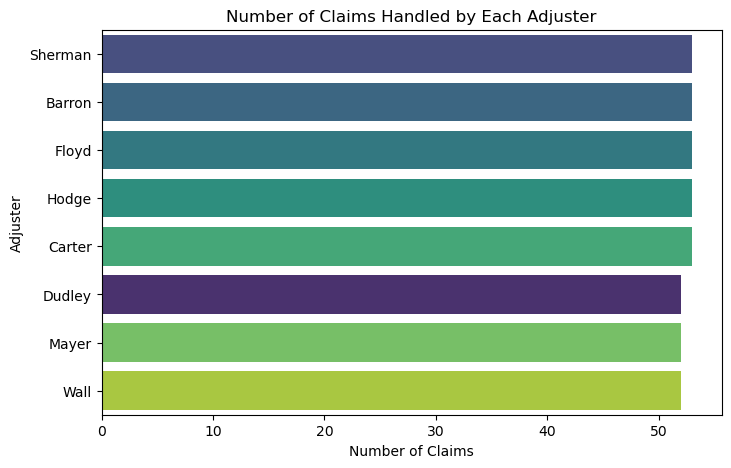

In [129]:
plt.figure(figsize=(8,5))
sns.countplot(y=df['Adjuster'], order=df['Adjuster'].value_counts().index, hue=df['Adjuster'], palette='viridis')
plt.xlabel("Number of Claims")
plt.ylabel("Adjuster")
plt.title("Number of Claims Handled by Each Adjuster")
plt.show()

### Task 9: Create a Pie Chart for a Nominal Variable
- Choose any nominal/categorical column and visualize its distribution using a pie chart.

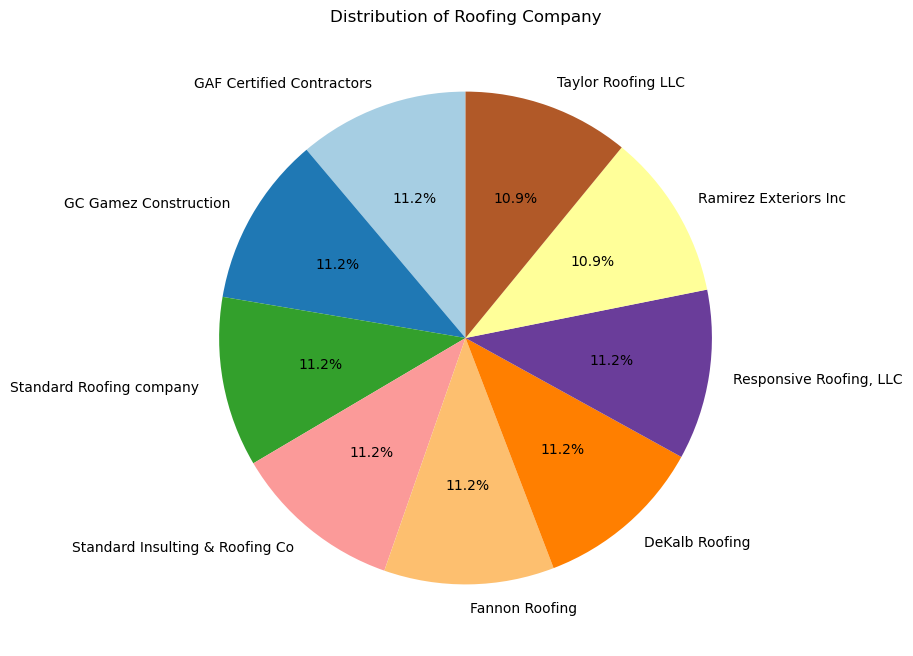

In [130]:
# **Good candidates:** `Adjuster`, `City`, `County`.
category = 'Roofing Company'  # Change this to another column if desired
plt.figure(figsize=(8,8))
df[category].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Paired')
plt.title(f"Distribution of {category}")
plt.ylabel("")  # Hide default y-label
plt.show()

### Task 10: Create a Bar Chart Showing Mean Repair Costs per Roofing Company
- Create a bar chart showing the average `Estimated cost to repair` for each `Roofing Company`
- Hint 1: You will have to do a `groupby()` command before plotting
- Hint 2: Create a PANDAS `series` called `avg_repair_by_roofing_coy` via the `groupby()` command, then create the plot using the `avg_repair_by_roofing_coy` data

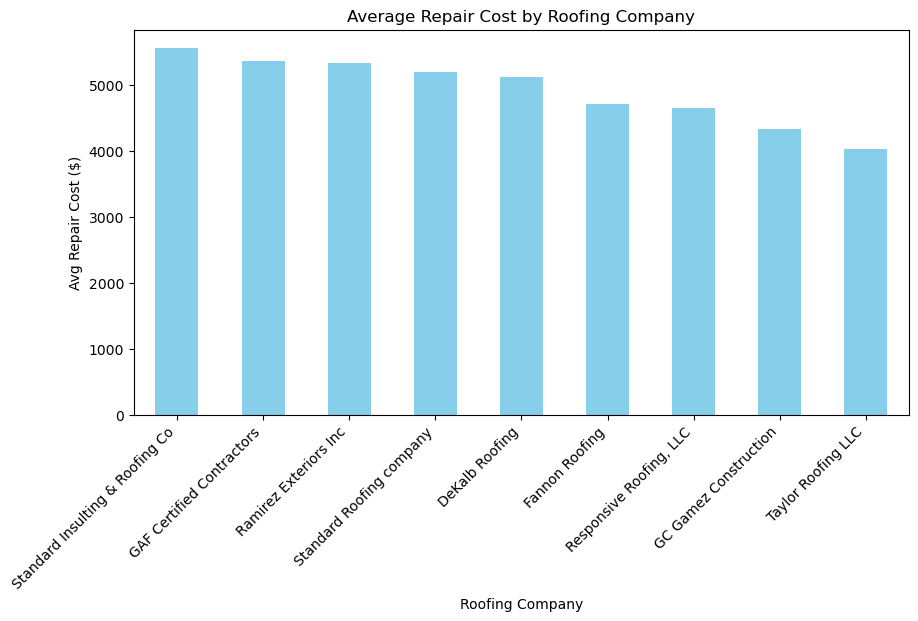

In [131]:
avg_repair_by_roofing_coy = df.groupby('Roofing Company')['Estimated cost to repair'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
avg_repair_by_roofing_coy.plot(kind='bar', color='skyblue')
plt.title("Average Repair Cost by Roofing Company")
plt.xlabel("Roofing Company")
plt.ylabel("Avg Repair Cost ($)")
plt.xticks(rotation=45, ha='right')
plt.show()

<br> There are lots of ways we can customize the plot. Below I use a custom color, remove the border, add 'padding' below the title and around the x-axis and y-axis labels, change the font size, and add bold font. 

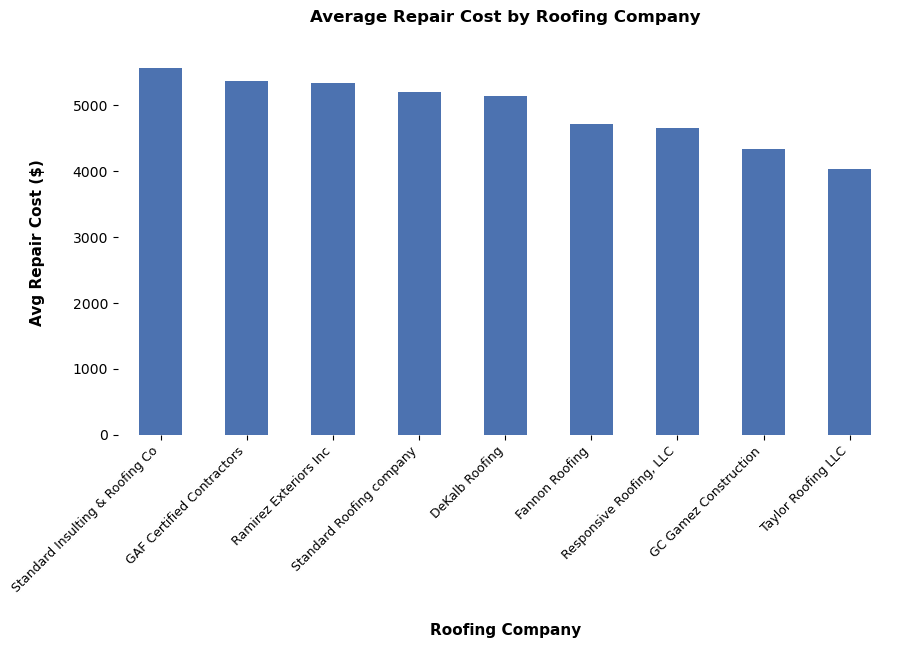

In [136]:
# Get Seaborn's default blue color
seaborn_blue = sns.color_palette("deep")[0]

avg_repair_by_roofing_coy = df.groupby('Roofing Company')['Estimated cost to repair'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
avg_repair_by_roofing_coy.plot(kind='bar', color=seaborn_blue)
plt.title("Average Repair Cost by Roofing Company", fontsize=12, pad=20, fontweight='bold')
plt.xlabel("Roofing Company", labelpad=20, fontsize=11, fontweight='bold')  # Added label padding, font size, bold font
plt.ylabel("Avg Repair Cost ($)", labelpad=20, fontsize=11, fontweight='bold')  # Added label padding, font size, bold font
plt.xticks(rotation=45, ha='right', fontsize=9)  # Align labels properly


plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)  # Remove border

plt.show()


---

## **Deliverables**
1. Submit the link to you Google Colab notebook in the assignment area in Canvas.
2. Include comments in your code to explain each step.

## Submission
- Submit your completed Colab notebook with all code cells executed.
- Ensure your notebook includes helpful explanations (as Markdown cells) for each step.